#**Name**
**Izaz khan**
#**Registration No**
**B23F0001AI029**

# **Lab 02:Working on Dataset**

I am going to work around data.  
I will use a library called **Pandas** to clean up a dataset of the top 1000 IMDB movies.  


After that, I use another library, **Matplotlib**


**Code to make folder for Datasets and Notebooks in Drive**

In [1]:
base_dir = '/content/drive/MyDrive/'
notebook_dir = base_dir + 'Colab/Notebooks/'
data_dir = base_dir + 'Dataset/'

**Pandas is for handling the data table, and Matplotlib is for making the graphs.**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

**now I load the CSV file with all the movie info into a pandas DataFrame.**

In [7]:
df = pd.read_csv(data_dir + 'imdb_top_1000.csv')

**i check the first few rows to make sure it loaded correctly and see how data looks like.**

In [9]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


#**Task 1:Data Cleaning**

**How many movies are missing a Metascore?**



In [10]:
missing_metascore_count = df['Meta_score'].isnull().sum()
print(f"Number of movies missing a Meta_score: {missing_metascore_count}")

Number of movies missing a Meta_score: 157


**Fill missing Revenue values.**

The `Gross` column -> which is the revenue. I used the median because if a some movies made a crazy amount of money it donot mess up the number.

In [19]:
df_filled = df.copy()
median_gross = df_filled['Gross'].median()
df_filled['Gross'] = df_filled['Gross'].fillna(median_gross)

**i again check to make sure there is no missing value**


In [20]:
print("Missing Gross values in the new DataFrame:", df_filled['Gross'].isnull().sum())


Missing Gross values in the new DataFrame: 0


**Filter movies from 2012 with a Rating > 7.5.**    
I filter the list to only show movies that was released in 2012 and have an `IMDB_Rating` higher than 7.5.


In [21]:
is_2012 = df_filled['Released_Year'] == 2012
is_high_rating = df_filled['IMDB_Rating'] > 7.5


**Now i combine the two filters to get my final list**


In [22]:
filtered_movies = df_filled[is_2012 & is_high_rating]
filtered_movies


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


#**Task 2:Visualizing**

**making graphs way easier to see patterns with a chart instead of just looking at a big table of numbers.**


**Create a scatter plot of Rating vs. Revenue.**  



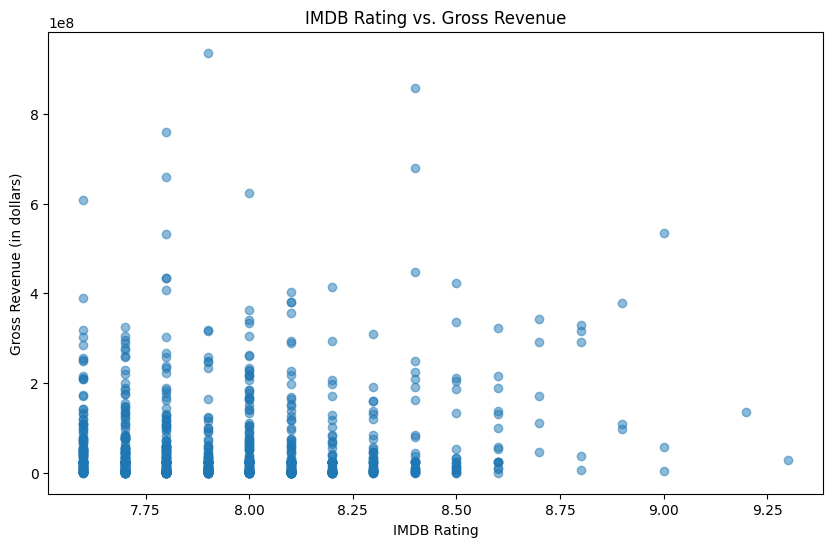

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filled['IMDB_Rating'], df_filled['Gross'], alpha=0.5)

plt.title('IMDB Rating vs. Gross Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Revenue (in dollars)')
plt.show()


**Make a bar chart of the top 5 directors.**  



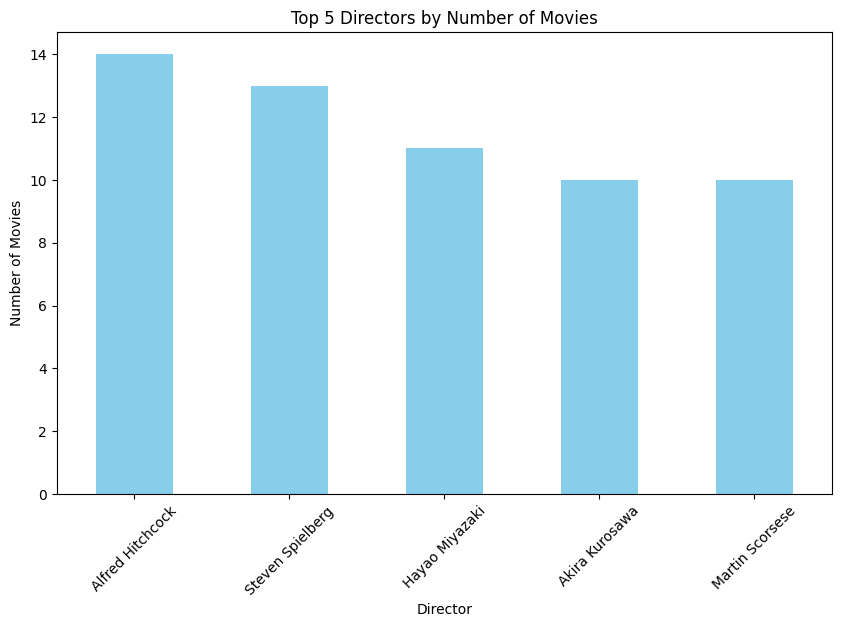

In [25]:
top_5_directors = df_filled['Director'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_5_directors.plot(kind='bar', color='skyblue')

plt.title('Top 5 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


**Challenge: Create a histogram for the Votes column.**  



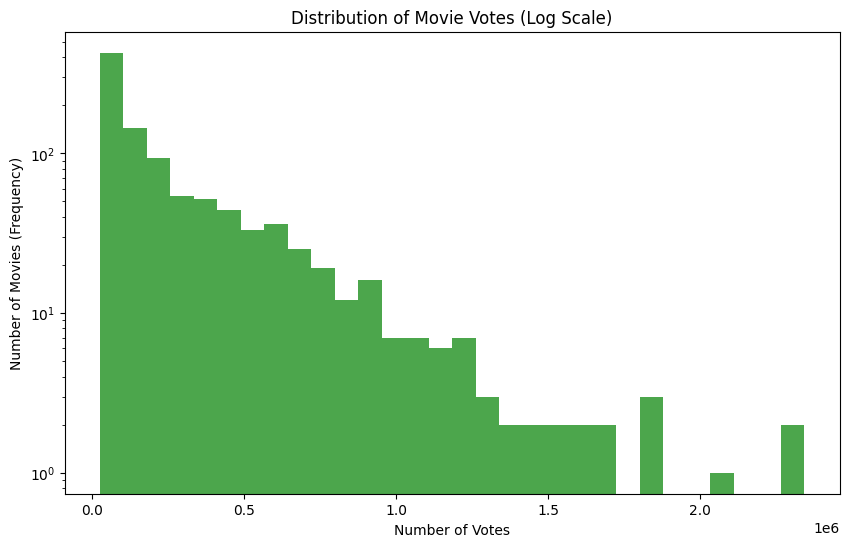

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df_filled['No_of_Votes'], bins=30, color='green', alpha=0.7)
plt.yscale('log')

plt.title('Distribution of Movie Votes (Log Scale)')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies (Frequency)')
plt.show()


#**Conclusion**

In this lab, I Learn a lot.  

- I used Pandas to take a messy dataset and clean it up.  
- I found empty spots for `Meta_score` and `Gross` revenue and filled them in with the median.  
- Filtering the data to find specific movies from 2012 with a high `IMDB_Rating` was also pretty useful.  

The graphing part was the best:  
- I made a scatter plot and saw that movies with better ratings usually make more money, but not always.  
- The bar chart showed me that some directors like Alfred Hitchcock have made a ton of movies.  
- The histogram for votes showed me that most movies get a normal amount of votes, but a few get a crazy high number, and using the log scale trick really helped to see that.  

It was a good lab.
